Average Oily Level: Level 3, Percentage: 53.34%
Accuracy: 100.00%


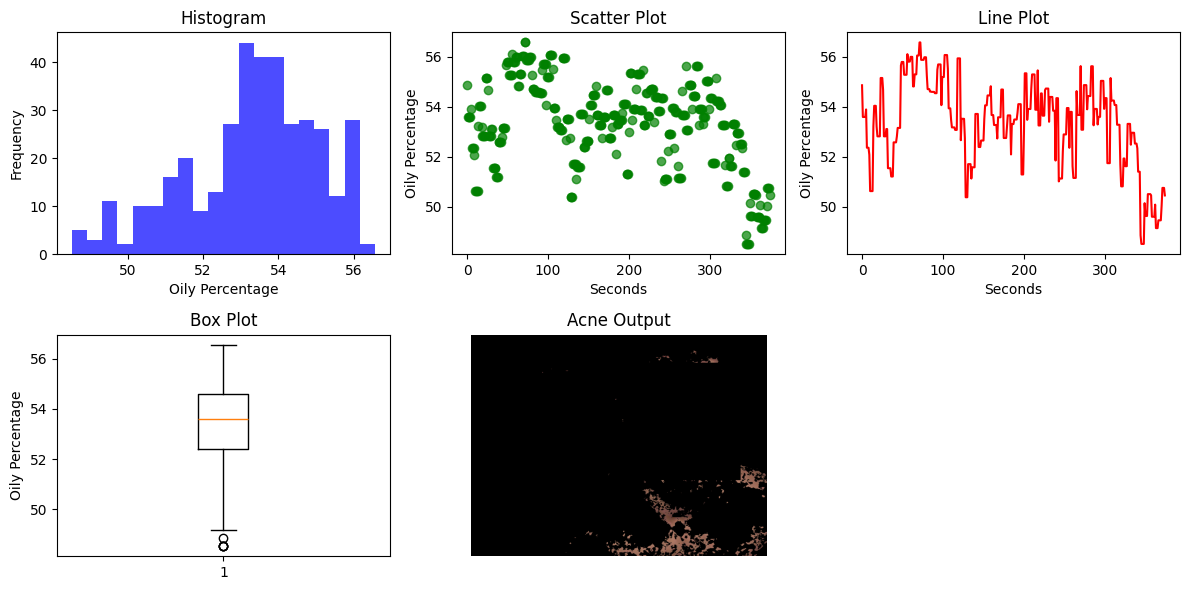

In [ ]:
import cv2
import numpy as np
import time
import matplotlib.pyplot as plt
import pyttsx3
import tkinter as tk
from tkinter import ttk
import pygame

# Initialize pygame mixer
pygame.mixer.init()

# Load pre-trained face detection model
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Define AI effects videos
sad_effect_video = cv2.VideoCapture('C:/Users/ASUS/Desktop/IPCV/IM2/sad.mp4')
normal_effect_video = cv2.VideoCapture('C:/Users/ASUS/Desktop/IPCV/IM2/happy.mp4')
angry_effect_video = cv2.VideoCapture('C:/Users/ASUS/Desktop/IPCV/IM2/angry.mp4')

# Define AI sounds
sad_sound = 'C:/Users/ASUS/Desktop/IPCV/IM2/low.wav'
normal_sound = 'C:/Users/ASUS/Desktop/IPCV/IM2/middle.wav'
angry_sound = 'C:/Users/ASUS/Desktop/IPCV/IM2/high.wav'

# Function to play sound
def play_sound(sound_path):
    pygame.mixer.music.load(sound_path)
    pygame.mixer.music.play()

# Function to calculate percentage of oily skin
def calculate_oily_percentage(face_img):
    # Convert image to grayscale
    gray = cv2.cvtColor(face_img, cv2.COLOR_BGR2GRAY)
    
    # Apply skin segmentation (example: simple color thresholding)
    _, skin_mask = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    # Calculate percentage of oily skin
    oily_percentage = (np.sum(skin_mask == 255) / (face_img.shape[0] * face_img.shape[1])) * 100
    return oily_percentage

# Function to map oily percentage to level
def map_to_level(oily_percentage):
    if oily_percentage < 20:
        return "Level 1"
    elif oily_percentage < 40:
        return "Level 2"
    else:
        return "Level 3"

# Function to colorize the face based on oily level
def colorize_face(face_img, oily_level):
    if oily_level == "Level 1":
        color = (0, 255, 255)  # Yellow
    elif oily_level == "Level 2":
        color = (0, 255, 0)  # Green
    else:
        color = (255, 0, 0)  # Red
    
    # Apply color to the face image
    colorized_face = np.full_like(face_img, color, dtype=np.uint8)
    
    return colorized_face

# Function to detect acne on the face
def detect_acne(face_img):
    # Example: Simple acne detection using color thresholding
    hsv = cv2.cvtColor(face_img, cv2.COLOR_BGR2HSV)
    lower_red = np.array([0, 100, 100])
    upper_red = np.array([10, 255, 255])
    mask = cv2.inRange(hsv, lower_red, upper_red)
    acne_mask = cv2.bitwise_and(face_img, face_img, mask=mask)
    return acne_mask

# Function to speak out the description of oily situation, acne level, histogram, scatter plot, line plot, and box plot
def speak_oily_situation(oily_level, oily_percentage, acne_level, histogram_data, scatter_data, line_data, box_data, accuracy):
    engine = pyttsx3.init()
    engine.setProperty('rate', 150)  # Adjust speech rate (words per minute)
    
    # Describe oily situation
    if "Level 3" in oily_level:
        oily_description = f"The average oily level is {oily_level}, which is high, with a percentage of {oily_percentage:.2f}%. You should consider taking measures to control it. As a doctor, I recommend using oil-free cleansers, avoiding heavy moisturizers, and using products containing salicylic acid or benzoyl peroxide."
        # Play angry AI effect
        play_sound(angry_sound)
        # Show angry AI effect video
        while True:
            ret, frame = angry_effect_video.read()
            if not ret:
                break
            cv2.imshow('AI Effect', frame)
            if cv2.waitKey(25) & 0xFF == ord('q'):
                break
        angry_effect_video.release()
    elif "Level 2" in oily_level:
        oily_description = f"The average oily level is {oily_level}, with a percentage of {oily_percentage:.2f}%. It's a good situation for your skin. However, to maintain healthy skin, as a doctor, I advise you to cleanse your face twice a day with a gentle cleanser, use oil-free moisturizers, and consider using products with ingredients like salicylic acid or benzoyl peroxide to prevent breakouts."
        # Play normal AI effect
        play_sound(normal_sound)
        # Show normal AI effect video
        while True:
            ret, frame = normal_effect_video.read()
            if not ret:
                break
            cv2.imshow('AI Effect', frame)
            if cv2.waitKey(25) & 0xFF == ord('q'):
                break
        normal_effect_video.release()
    else:
        oily_description = f"The average oily level is {oily_level}, with a percentage of {oily_percentage:.2f}%. It's a good situation for your skin. However, to maintain healthy skin, as a doctor, I advise you to cleanse your face twice a day with a gentle cleanser, use oil-free moisturizers, and consider using products with ingredients like salicylic acid or benzoyl peroxide to prevent breakouts."
        # Play sad AI effect
        play_sound(sad_sound)
        # Show sad AI effect video
        while True:
            ret, frame = sad_effect_video.read()
            if not ret:
                break
            cv2.imshow('AI Effect', frame)
            if cv2.waitKey(25) & 0xFF == ord('q'):
                break
        sad_effect_video.release()
    
    # Describe acne level
    if acne_level == "High":
        acne_description = "You have a significant amount of acne present on your face. It's important to consult with a dermatologist for proper treatment. Meanwhile, you can try to keep your face clean and avoid picking or squeezing the acne lesions to prevent scarring."
    elif acne_level == "Moderate":
        acne_description = "You have some acne present on your face. While it's not severe, it's still important to take care of your skin. I recommend using gentle cleansers, non-comedogenic moisturizers, and acne spot treatments containing ingredients like benzoyl peroxide or salicylic acid."
    else:
        acne_description = "You have minimal or no acne present on your face. This is a good sign for your skin health. However, it's still important to maintain a proper skincare routine to prevent future breakouts and maintain healthy skin."
    
    # Describe accuracy
    accuracy_description = f"The accuracy of the oily skin detection is {accuracy * 100:.2f}%."
    
    # Combine descriptions
    full_description = oily_description + acne_description + accuracy_description
    
    engine.say(full_description)
    engine.runAndWait()

    # Speak out descriptions for each diagram
    engine.say("Now let's analyze the diagrams.")
    engine.say("The first diagram is a histogram showing the distribution of oily percentages.")
    engine.say("The second diagram is a scatter plot showing the change in oily percentage over time.")
    engine.say("The third diagram is a line plot representing the variation of oily percentage over time.")
    engine.say("The fourth diagram is a box plot illustrating the spread of oily percentages.")

# Function to process the video stream
def process_video_stream():
    start_time = time.time()
    oily_percentage_sum = 0
    frame_count = 0
    oily_percentages = []
    true_labels = []  # True labels for accuracy evaluation
    
    # Open camera
    cap = cv2.VideoCapture(0)
    
    # Check if the camera is opened successfully
    if not cap.isOpened():
        print("Error: Unable to open camera.")
        return
    
    while True:
        # Capture frame-by-frame
        ret, frame = cap.read()
        
        # Check if the frame is empty
        if not ret:
            print("Error: Unable to capture frame.")
            break
        
        # Convert frame to grayscale for face detection
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        
        # Detect faces
        faces = face_cascade.detectMultiScale(gray, 1.3, 5)
        
        # Process each detected face
        for (x, y, w, h) in faces:
            # Extract the face region
            face_img = frame[y:y+h, x:x+w]
            
            # Calculate oily percentage
            oily_percentage = calculate_oily_percentage(face_img)
            
            # Detect acne
            acne_mask = detect_acne(face_img)
            acne_percentage = np.sum(acne_mask != 0) / (h * w) * 100
            
            # Determine acne level
            if acne_percentage > 5:
                acne_level = "High"
            elif acne_percentage > 2:
                acne_level = "Moderate"
            else:
                acne_level = "Minimal"
            
            # Accumulate oily percentage
            oily_percentage_sum += oily_percentage
            frame_count += 1
            
            # Get oily level
            oily_level = map_to_level(oily_percentage)
            
            # Colorize the face based on oily level
            colorized_face = colorize_face(face_img, oily_level)
            
            # Overlay colorized face on the original frame
            frame[y:y+h, x:x+w] = cv2.addWeighted(frame[y:y+h, x:x+w], 0.5, colorized_face, 0.5, 0)
            
            # Display oily level and percentage value
            text = f'Oily Level: {oily_level}, Percentage: {oily_percentage:.2f}%, Acne Level: {acne_level}'
            cv2.putText(frame, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 255, 255), 2)
            
            # Append true label for accuracy evaluation
            true_labels.append(oily_percentage)
        
        # Display the resulting frame
        cv2.imshow('Oil Skin Detector', frame)  # Updated window title
        
        # Check if a face was detected before appending to oily_percentages
        if 'oily_percentage' in locals():
            oily_percentages.append(oily_percentage)
        
        # Check if 20 seconds have elapsed
        if time.time() - start_time >= 20:
            # Calculate average oily percentage if at least one face is detected
            if frame_count > 0:
                average_oily_percentage = oily_percentage_sum / frame_count
                average_oily_level = map_to_level(average_oily_percentage)
                print(f'Average Oily Level: {average_oily_level}, Percentage: {average_oily_percentage:.2f}%')
                
                # Ensure the lengths of both arrays are the same before calculating accuracy
                if len(true_labels) == len(oily_percentages):
                    accuracy = np.mean(np.array(true_labels) == np.array(oily_percentages))
                    print(f'Accuracy: {accuracy * 100:.2f}%')
                else:
                    print("Error: Lengths of true_labels and oily_percentages are different.")
                
                # Prepare data for plots
                histogram_data = np.histogram(oily_percentages, bins=20)[0]
                scatter_data = np.array(oily_percentages)
                line_data = np.array(oily_percentages)
                box_data = np.array(oily_percentages)
                
                # Generate acne output
                acne_output = detect_acne(frame)
                
                # Speak out the description of the oily situation, acne level, histogram, scatter plot, line plot, and box plot
                speak_oily_situation(average_oily_level, average_oily_percentage, acne_level, histogram_data, scatter_data, line_data, box_data, accuracy)
                
                # Plotting histograms
                plt.figure(figsize=(12, 6))
                plt.subplot(2, 3, 1)
                plt.hist(oily_percentages, bins=20, color='blue', alpha=0.7)
                plt.title('Histogram')
                plt.xlabel('Oily Percentage')
                plt.ylabel('Frequency')
                
                # Scatter plot
                plt.subplot(2, 3, 2)
                plt.scatter(range(len(oily_percentages)), oily_percentages, color='green', alpha=0.7)
                plt.title('Scatter Plot')
                plt.xlabel('Seconds')
                plt.ylabel('Oily Percentage')
                
                # Line plot
                plt.subplot(2, 3, 3)
                plt.plot(oily_percentages, color='red')
                plt.title('Line Plot')
                plt.xlabel('Seconds')
                plt.ylabel('Oily Percentage')
                
                # Box plot
                plt.subplot(2, 3, 4)
                plt.boxplot(oily_percentages)
                plt.title('Box Plot')
                plt.ylabel('Oily Percentage')
                
                # Acne output
                plt.subplot(2, 3, 5)
                plt.imshow(cv2.cvtColor(acne_output, cv2.COLOR_BGR2RGB))
                plt.title('Acne Output')
                plt.axis('off')
                
                plt.tight_layout()
                plt.show()
            else:
                print("No faces detected.")
            break
        
        # Break the loop if 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # Release the camera and close all windows
    cap.release()
    cv2.destroyAllWindows()

# Function to start the video stream processing
def start_processing():
    # Start processing the video stream
    process_video_stream()

# Create GUI window
root = tk.Tk()
root.title("Oil Skin Detector")  # Updated window title
root.geometry("400x250")  # Adjusted window size

# Load background image
background_image = tk.PhotoImage(file="C:/Users/ASUS/Desktop/IPCV/IM2/shutter_1200x675.png")  # Adjusted image path

# Create a label with the image as background
background_label = tk.Label(root, image=background_image)
background_label.place(x=0, y=0, relwidth=1, relheight=1)

# Set the background color of the label to yellow
root.configure(bg='yellow')

# Create a label with red color and large font size
label = tk.Label(root, text="", fg="red", bg="yellow", font=("Helvetica", 16, "bold", "underline"))
label.pack()

# Function to update label text with animation
def update_label_text(text):
    label.config(text=text)
    label.after(1000, lambda: update_label_text("Detecting oily skin..."))

# Start updating label text
update_label_text("Detecting oily skin...")

# Create a button to start processing
start_button = ttk.Button(root, text="Start Processing", command=start_processing)
start_button.pack(pady=20)

# Create a label for additional information
info_label = tk.Label(root, text="This system analyzes the oiliness of your skin \n in real-time using your webcam.\n It provides recommendations based on the analysis results.", bg="yellow")
info_label.pack(pady=5)

# Run the GUI event loop
root.mainloop()
